In [1]:
import os
import xarray as xr

# Folder where all the .nc files are stored
nc_directory = "../CAMELS_SW/output_data/nival_suf_data"

# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the mean of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the mean across all datasets for each variable
mean_ds = xr.concat(datasets, dim="iteration").mean(dim="iteration")

# Display the final dataset with mean values
mean_ds


C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_period) float64 0.03268 0.04694 ... 0.1383
    KGE"           (init_date, target_period) float64 -0.3269 ... -0.5548
    KGE"_r         (init_date, target_period) float64 -0.0493 ... -0.2654
    KGE"_alpha     (init_date, target_period) float64 0.2061 0.2155 ... 0.1332
    KGE"_beta      (init_date, target_period) float64 0.00755 ... 0.01773
    perc_diff      (init_date, target_period) float64 4.675 4.598 ... nan 62.36

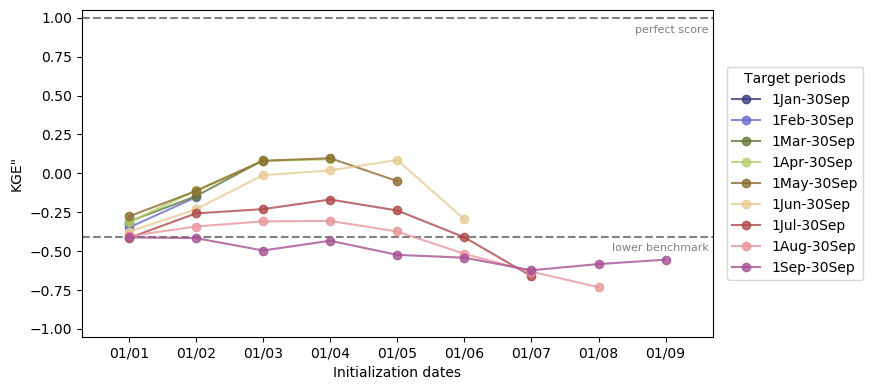

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Use the mean dataset loaded earlier (mean_ds) for the 'KGE"' data
KGE_mean = mean_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = mean_ds.target_period.values
init_dates = mean_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" mean data for each target period
    toplot = KGE_mean.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [3]:
# Save the figure
fig.savefig('../CAMELS_SW/output_plots/evaluation/KGE_nival_mean.png', dpi=300)

In [4]:
# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
median_ds

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_period) float64 0.02 0.03 ... nan 0.08
    KGE"           (init_date, target_period) float64 -0.33 -0.38 ... nan -0.56
    KGE"_r         (init_date, target_period) float64 -0.05 -0.1 ... nan -0.28
    KGE"_alpha     (init_date, target_period) float64 0.2 0.19 0.2 ... nan 0.13
    KGE"_beta      (init_date, target_period) float64 0.01 0.01 0.0 ... nan 0.01
    perc_diff      (init_date, target_period) float64 4.35 4.3 ... nan 39.96

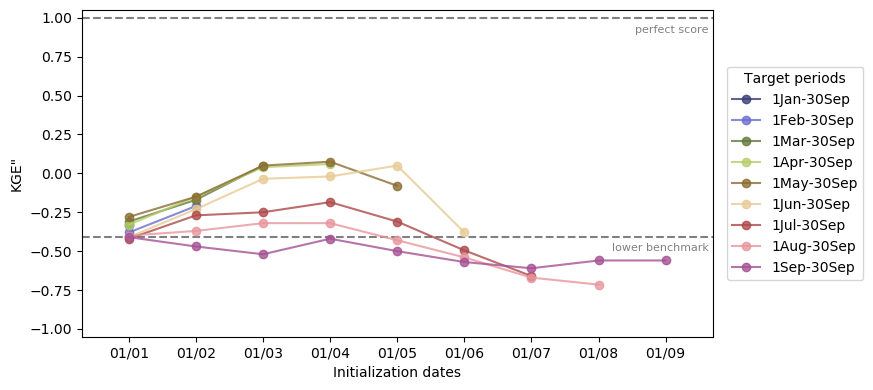

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
# Save the figure
fig.savefig('../CAMELS_SW/output_plots/evaluation/KGE_nival_median.png', dpi=300)